In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ruta_archivo1 = "Datasets/ElectricCarData_Clean.csv"
df = pd.read_csv(ruta_archivo1)

df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


# ETL

In [4]:
# Contar los valores nulos en cada columna de df
nulos_por_columna = df.isnull().sum()

# Mostrar el conteo de nulos por columna
print(nulos_por_columna)


Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


In [5]:
# Convertir valores no numéricos a NaN y cambiar el tipo de la columna a numérico
df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'], errors='coerce')

In [6]:
# Contar los valores nulos en cada columna de df
nulos_por_columna = df.isnull().sum()

# Mostrar el conteo de nulos por columna
print(nulos_por_columna)


Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     5
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


In [7]:
# Cambiamos los nombres de las columnas
df.rename(columns={
    'Brand': 'Marca',
    'Model': 'Modelo',
    'AccelSec': 'Aceleracion_Sec', # aceleración de 0 a 100 en k/h.
    'TopSpeed_KmH': 'VelocidadMax_KmH',
    'Range_Km': 'Autonomia_Km', # Autonomía con una sola carga
    'Efficiency_WhKm': 'Eficiencia_WhKm', # cuánta energía (vatios/hora) se necesitan para que recorra 1 kilómetro.
    'FastCharge_KmH': 'CargaRapida_KmH', # cuántos kiolmetros de autonomía se pueden cargar en una hora
    'RapidCharge': 'CargaRapida',# si soporta carga rápida
    'PowerTrain': 'Tipo_tracción',
    'PlugType': 'TipoEnchufe',
    'BodyStyle': 'EstiloCarroceria',
    'Segment': 'Segmento',
    'Seats': 'Asientos',
    'PriceEuro': 'PrecioEuro'
}, inplace=True)


Estadísticas descriptivas:

- Aceleración (Aceleracion_Sec): El tiempo promedio de aceleración de 0 a 100 km/h es de aproximadamente 7.4 segundos. El rango de aceleración va desde muy rápido (2.1 segundos) hasta relativamente lento (22.4 segundos).

- Velocidad Máxima (VelocidadMax_KmH): La velocidad máxima promedio es de 179 km/h, con una variaciòn que va desde los 123 km/h hasta los 410 km/h.

- Autonomía (Autonomia_Km):La autonomía promedio es de aproximadamente 339 km, lo que nos indica que muchos de estos vehículos pueden satisfacer las necesidades diarias de movilidad sin recarga. La autonomía varía ampliamente de 95 km a 970 km

- Eficiencia (Eficiencia_WhKm):La eficiencia energética promedio es de 189 Wh/km. Un valor más bajo es mejor en términos de eficiencia, ya que significa que el vehículo consume menos energía para recorrer la misma distancia. La eficiencia varía de 104 Wh/km a 273 Wh/km.

- Carga en una hora (CargaRapida_KmH): El promedio de autonomía por hora de carga rápida es de aproximadamente 456.73 km. La desviación estándar es de 201.26 km/h, lo que muestra una variabilidad considerable en la capacidad de carga rápida entre diferentes modelos que va desde 170 km/h a 940 km/h

- Asientos: La mayoría de los vehículos tienen capacidad para aproximadamente 5 pasajeros, lo que es típico para sedanes y SUV medianos. La variación en el número de asientos (de 2 a 7) indica la inclusión de vehículos compactos, deportivos, así como vehículos más grandes diseñados para familias o grupos.

- Precio (PrecioEuro):El precio promedio es de aproximadamente 55,811 euros. El precio tiene una variación significativa uqe va desde los 20,129 euros hasta los 215,000 euros. 

In [8]:
df.describe()

,Aceleracion_Sec,VelocidadMax_KmH,Autonomia_Km,Eficiencia_WhKm,CargaRapida_KmH,Asientos,PrecioEuro
count,103.000000,103.000000,103.000000,103.000000,98.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,456.734694,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,201.262897,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,275.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,560.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marca             103 non-null    object 
 1   Modelo            103 non-null    object 
 2   Aceleracion_Sec   103 non-null    float64
 3   VelocidadMax_KmH  103 non-null    int64  
 4   Autonomia_Km      103 non-null    int64  
 5   Eficiencia_WhKm   103 non-null    int64  
 6   CargaRapida_KmH   98 non-null     float64
 7   CargaRapida       103 non-null    object 
 8   Tipo_tracción     103 non-null    object 
 9   TipoEnchufe       103 non-null    object 
 10  EstiloCarroceria  103 non-null    object 
 11  Segmento          103 non-null    object 
 12  Asientos          103 non-null    int64  
 13  PrecioEuro        103 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 11.4+ KB


## Los 10 modelos màs eficientes

In [10]:
# Ordenar el DataFrame por la columna 'Eficiencia_WhKm' de forma ascendente para obtener los más eficientes primero
df_ordenado = df.sort_values(by='Eficiencia_WhKm', ascending=True)

# Seleccionar las columnas 'Marca', 'Modelo', 'Eficiencia_WhKm', y 'PrecioEuro', y obtener los primeros 10 registros
top10_eficientes = df_ordenado[['Marca', 'Modelo', 'Eficiencia_WhKm', 'PrecioEuro']].head(10)

# Mostrar el top 10 de los modelos más eficientes con su marca, eficiencia y precio
print(top10_eficientes)



         Marca                         Modelo  Eficiencia_WhKm  PrecioEuro
48  Lightyear                            One               104      149000
8       Tesla     Model 3 Standard Range Plus              153       46380
14    Hyundai                  IONIQ Electric              153       34459
41    Hyundai            Kona Electric 39 kWh              154       33971
74       Sono                           Sion               156       25500
19       Mini                      Cooper SE               156       31681
12    Hyundai            Kona Electric 64 kWh              160       40795
28        BMW                       i3 120 Ah              161       38017
60    Renault                   Zoe ZE40 R110              161       29234
0       Tesla   Model 3 Long Range Dual Motor              161       55480


## Los 10 modelos menos eficientes.

In [11]:
# Ordenar el DataFrame por la columna 'Eficiencia_WhKm' de forma descendente 
df_ordenado_menos_eficientes = df.sort_values(by='Eficiencia_WhKm', ascending=False)

# Seleccionar las columnas 'Marca', 'Modelo', 'Eficiencia_WhKm', y 'PrecioEuro', y obtener los primeros 10 registros
bottom10_eficientes = df_ordenado_menos_eficientes[['Marca', 'Modelo', 'Eficiencia_WhKm', 'PrecioEuro']].head(10)

# Mostrar el top 10 de los modelos menos eficientes con su marca, eficiencia y precio
print(bottom10_eficientes)

         Marca                           Modelo  Eficiencia_WhKm  PrecioEuro
84   Mercedes                      EQV 300 Long              273       70631
90       Audi               e-tron S 55 quattro              270       93800
33      Tesla              Cybertruck Tri Motor              267       75000
67      Tesla             Cybertruck Dual Motor              261       55000
99       Audi     e-tron S Sportback 55 quattro              258       96050
86      Tesla           Cybertruck Single Motor              256       45000
73      Byton                 M-Byte 95 kWh 4WD              244       64000
102     Byton                 M-Byte 95 kWh 2WD              238       62000
50       Audi                 e-tron 55 quattro              237       79445
101    Nissan   Ariya e-4ORCE 87kWh Performance              232       65000


## Correlación entre variables

Utilizamos correlación de Pearson para medir la relación lineal entre dos variables cuantitativas. El coeficiente de correlación de Pearson, que varía entre -1 y 1, indica el grado y la dirección de la asociación lineal entre las variables. La correlación no implica necesariamente causalidad.

Conclusiones:

- Autonomía (Autonomia_Km) y Eficiencia (Eficiencia_WhKm):
La correlación entre la autonomía y la eficiencia es de 0.313077, lo cual indica una correlación positiva débil. Esto sugiere que hay una tendencia leve hacia una mayor eficiencia (menor Wh/Km) a medida que aumenta la autonomía del vehículo, pero no es una relación fuerte. Es decir, los vehículos con mayor autonomía no necesariamente son los más eficientes en términos de consumo energético.

- Autonomía (Autonomia_Km) y Precio (PrecioEuro):
La correlación entre la autonomía y el precio es 0.674844, indicando una correlación positiva moderada a fuerte. Esto significa que, en general, los vehículos con mayor autonomía tienden a ser más caros. 

- Eficiencia (Eficiencia_WhKm) y Precio (PrecioEuro):
La correlación entre la eficiencia y el precio es 0.396705, lo cual es una correlación positiva débil a moderada. Esto indica que hay una tendencia hacia vehículos más caros a medida que aumenta la eficiencia (menor Wh/Km), pero la relación no es fuerte.





                 Autonomia_Km  Eficiencia_WhKm  PrecioEuro
Autonomia_Km         1.000000         0.313077    0.674844
Eficiencia_WhKm      0.313077         1.000000    0.396705
PrecioEuro           0.674844         0.396705    1.000000


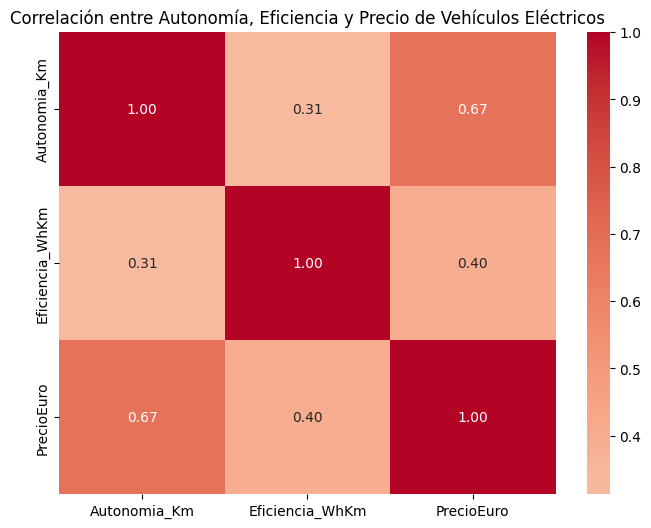

In [12]:

# Seleccionamos las columnas de interés
columnas_interes = ['Autonomia_Km', 'Eficiencia_WhKm', 'PrecioEuro']

# Calcular la matriz de correlación entre estas columnas
matriz_correlacion = df[columnas_interes].corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)

# Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlación entre Autonomía, Eficiencia y Precio de Vehículos Eléctricos")
plt.show()
